In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Reading the data 
credit_risk= pd.read_csv("/Users/daskrantik01/Downloads/UCI_credit_card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Reading the data 
credit_risk= pd.read_csv("/Users/daskrantik01/Downloads/UCI_credit_card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df = credit_risk
df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

In [5]:
# lets see the values count in column marriage
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [6]:
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

In [7]:
# Lets see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
# As we seen Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace= True) #axis=1 -- column removal and inplcae= True --means change in the original data

In [9]:
# Lets check the statistics of data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.807767,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.712528,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
# checking for missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
# Lets see the value counts in EDUCATION columns:
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

In [12]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown" 
#Changing 0,5 and 6 to keep it under 1 category.

df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

In [13]:
# lets see the values count in column marriage
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

In [14]:
# Here I am going to map 0 with 1
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

Analysis of column "PAY_0 to PAY_6"

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [15]:
# Lets see the value counts in column 'PAY_0'
df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

# Data Visualization

/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

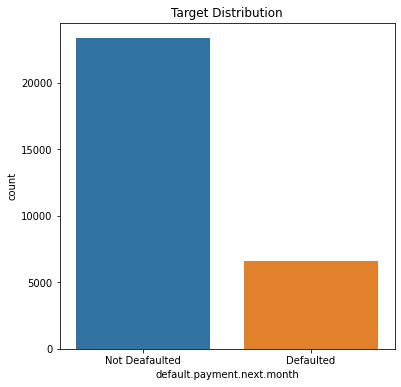

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(df['default.payment.next.month'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

In [17]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

<Figure size 432x432 with 0 Axes>

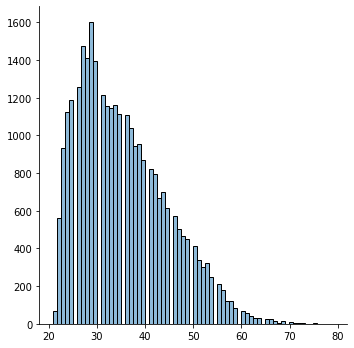

In [18]:
# with age column
plt.figure(figsize=(6,6))
sns.displot(df['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender Distribution')

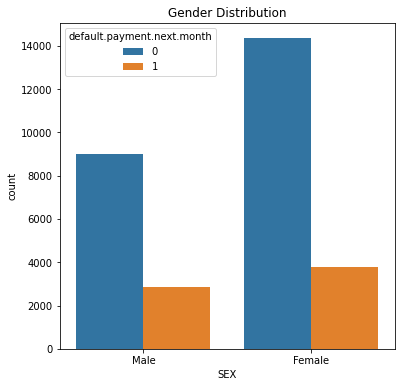

In [19]:
# With sex columns 
#Gender (1=male, 2=female)
plt.figure(figsize=(6,6))
sns.countplot('SEX',hue='default.payment.next.month',data=df)
plt.xticks([0,1], labels=["Male", "Female"])
#plt.xlabel({1:'Male',2:'Feamle'})
plt.title("Gender Distribution")

/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education Distribution')

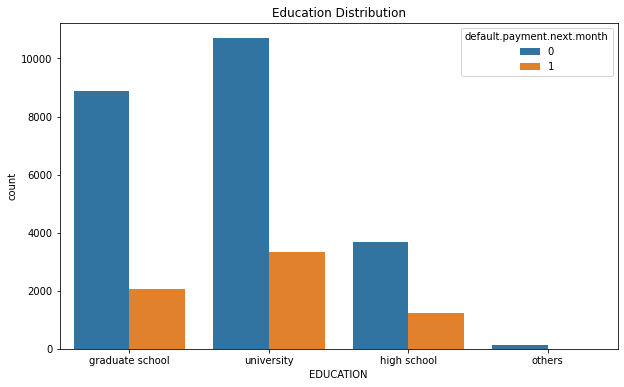

In [20]:
# With EDUCATION columns 
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.figure(figsize=(10,6))
sns.countplot('EDUCATION', hue='default.payment.next.month',data=df)
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")

/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MARRIAGE Distribution')

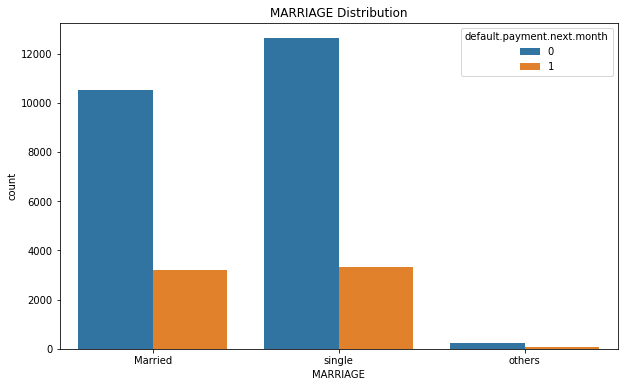

In [21]:
# With MARRIAGE columns 
#
plt.figure(figsize=(10,6))
sns.countplot('MARRIAGE',hue='default.payment.next.month',data=df)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

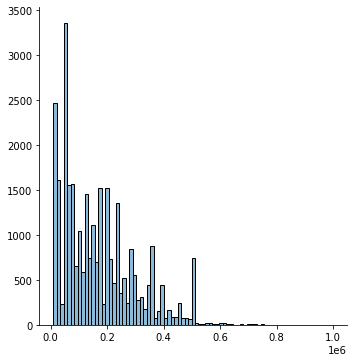

In [22]:
# With column 'limit_bal'
sns.displot(df.LIMIT_BAL, kde=True)

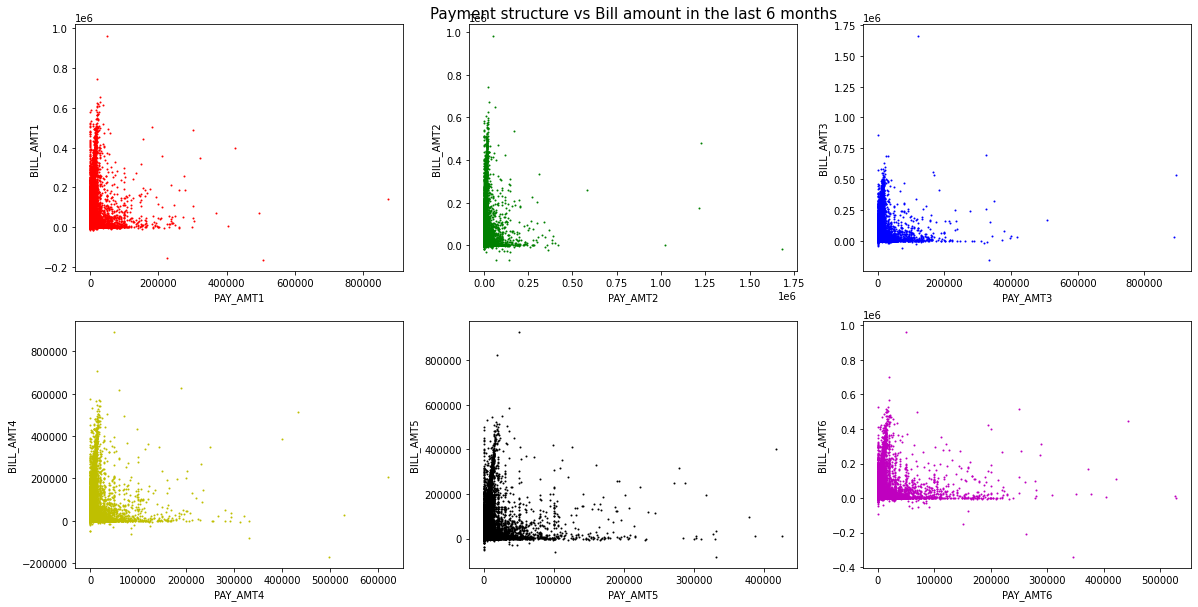

In [23]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

# Creating Independent features and depened features


In [24]:
# Independnet features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']
X.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


# Scalling the features

* So, scalling the independent features are very important so that our model is not biased toward the higher range of values. To make all features in same range
* Here we are using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

# Balancing the data

* since our dataset was imbalace, so used SMOTE technique to make it balanced.
* For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement [2]. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.

In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade scikit-learn

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


# Building Model

* Logistic Regression
* Random Forest Classifier
* XGBoost Classifier
* Support vector machine classifier

# Logistic regression Model:

In [29]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predicting the model
pred_logit= logit.predict(X_test)

### Evaluation metrics

In [ ]:
pip install --upgrade scikit-learn

In [31]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.62      6000
weighted avg       0.77      0.68      0.71      6000



In [32]:
import sklearn
print(sklearn.__version__)

1.3.0


In [33]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.62      6000
weighted avg       0.77      0.68      0.71      6000



In [36]:
!pip install sklearn

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2361 sha256=33cdf7fde989836e8b69b012726d27c02f44aa1b887f6e5e5f136e0b9244ea4d
  Stored in directory: /Users/daskrantik01/Library/Caches/pip/wheels/bc/86/46/dd4e366dc5e1303b4d6927d2a603a1ae7f979d488a5d202330
Successfully built sklearn


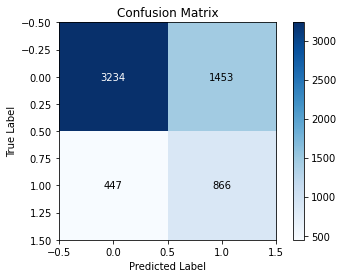

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_test' (true labels) and 'pred_logit' (predicted labels) defined
cm = confusion_matrix(y_test, pred_logit)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add label annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()


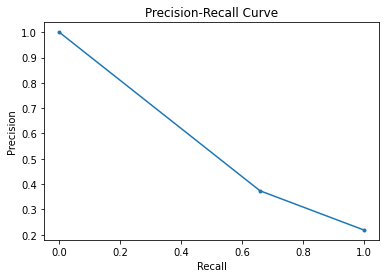

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming you have 'y_test' (true labels) and 'pred_logit' (predicted probabilities) defined
precision, recall, _ = precision_recall_curve(y_test, pred_logit)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


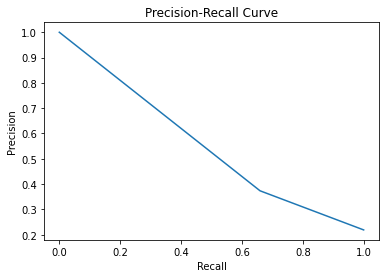

In [47]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# Assuming you have 'y_test' (true labels) and 'pred_logit' (predicted probabilities) defined
precision, recall, _ = precision_recall_curve(y_test, pred_logit)

data = {'Recall': recall, 'Precision': precision}
df = pd.DataFrame(data)

sns.lineplot(x='Recall', y='Precision', data=df)
plt.title('Precision-Recall Curve')
plt.show()


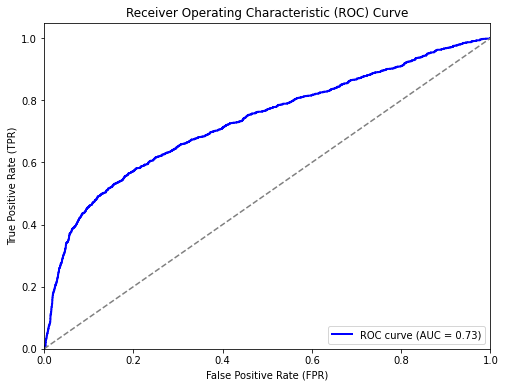

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have 'logit' (fitted logistic regression model), 'X_test' (test features), and 'y_test' (true labels) defined

# Get predicted probabilities from the logistic regression model
y_prob = logit.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [52]:
pip install xgboost


     |████████████████████████████████| 1.8 MB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [53]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

# Evaluating the model


In [55]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy of logit model is: 0.8071666666666667
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.59      0.40      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



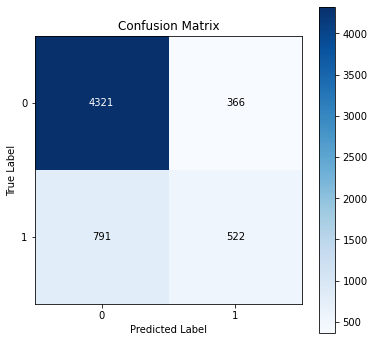

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have 'xgb_clf' (fitted XGBoost classifier), 'X_test' (test features), and 'y_test' (true labels) defined

# Get the predicted labels from the XGBoost classifier
y_pred = xgb_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add label annotations
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()


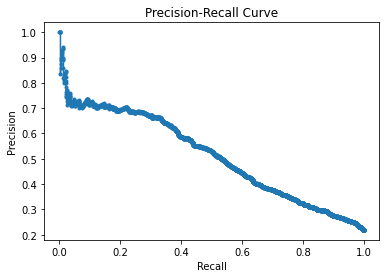

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have 'xgb_clf' (fitted XGBoost classifier), 'X_test' (test features), and 'y_test' (true labels) defined

# Get predicted probabilities from the XGBoost classifier
y_prob = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Hyperparameter tunning

In [59]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}



In [60]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [61]:
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [62]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
# Finding the best param
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [65]:
import xgboost as xgb

Accuracy: 0.8165
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



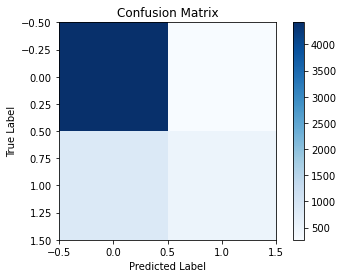

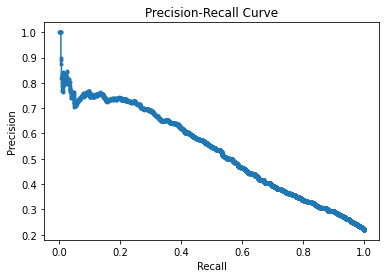

In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have 'X' (features) and 'y' (labels) defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            gamma=0.2,
                            learning_rate=0.15,
                            max_depth=15,
                            reg_lambda=10)

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy and print classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and plot the precision-recall curve
y_prob = xgb_clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [68]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have 'X' (features) and 'y' (labels) defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier with hyperparameters set in the constructor
classifier = xgb.XGBClassifier(objective='binary:logistic',
                               gamma=0.2,
                               learning_rate=0.15,
                               max_depth=15,
                               reg_lambda=10,
                               min_child_weight=1,
                               subsample=0.9,
                               colsample_bytree=0.50,
                               use_label_encoder=False)


/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [69]:
# Fit the model on the training data
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
# Predicting model
y_pred= classifier.predict(X_test)

### Evaluating the model after hyperparameter tuning


In [71]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

The accuracy of the model is: 0.8178333333333333
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## Cross validation

In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/daskrantik01/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

In [73]:
score

array([0.801     , 0.80566667, 0.81466667, 0.80166667, 0.81233333,
       0.82233333, 0.83033333, 0.82466667, 0.826     , 0.819     ])

In [75]:
score.mean()

0.8157666666666665